# Bài toán:
> **Phân cụm dữ liệu bằng giải thuật K-means (unsupervised learning)**

Mục tiêu 
- Xây dựng mô hình Kmeans sử dụng thư viện sklearn. 
- Áp dụng hai mô hình để giải bài toán thực tế (nén ảnh).
- Nắm được cách tinh chỉnh tham số và đánh giá chất lượng mô hình

Dữ liệu 
- Bài toán mô phỏng Kmeans: Sử dụng hàm sinh dữ liệu tự động của sklearn (sinh ra các điểm ngẫu nhiên theo phân phối Gauss). Mỗi dữ liệu là một điểm trên mặt phẳng Oxy
- Bài toán nén ảnh: Ảnh bird_small.png (Hình ảnh về một chú chim)

Mô hình hóa bài toán: bài toán phân cụm.

- Đâu vào: $N$ vector $D$ chiều, tương ứng $N$ điểm dữ liệu với $D$ thuộc tính trong không gian. Số cụm khởi tạo.
- Đầu ra: Các tâm cụm và chỉ số cụm của mỗi điểm dữ liệu đã cho ban đầu.

# Các bước làm

In [98]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


## Bài toán 1: Mô phỏng Kmeans với dữ liệu tự sinh (không gian Oxy)

### Chuẩn bị dữ liệu 
- Sinh dữ liệu ngẫu nhiên n_samples = 100 tương đương 100 điểm 
    - random_state: biến cố định hàm random - để các điểm sinh ngẫu nhiên 
    
- Mỗi điểm dữ liệu có 2 chiều 

In [99]:
n_samples = 100
random_state = 150
center_points = [[1, 1], [-1, -1], [1, -1]] # sinh ngẫu nhiên các điểm xung quanh vị trí tâm cố định 
# center_points = 3                           # tâm cụm được chọn ngẫu nhiên

X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=center_points, cluster_std=0.6)
print("Số chiều dữ liệu: ", X.shape, y.shape)
print("5 điểm dữ liệu đầu tiên: \n", X[:5])

Số chiều dữ liệu:  (100, 2) (100,)
5 điểm dữ liệu đầu tiên: 
 [[ 0.86520469  0.79418   ]
 [ 1.09974039  2.14804728]
 [ 1.14181205 -1.79551405]
 [-2.13854144 -1.42760052]
 [-2.34221961 -1.90170508]]


In [100]:
set(y)

{np.int64(0), np.int64(1), np.int64(2)}

**Vẽ các điểm ảnh sử dụng matlib plot**

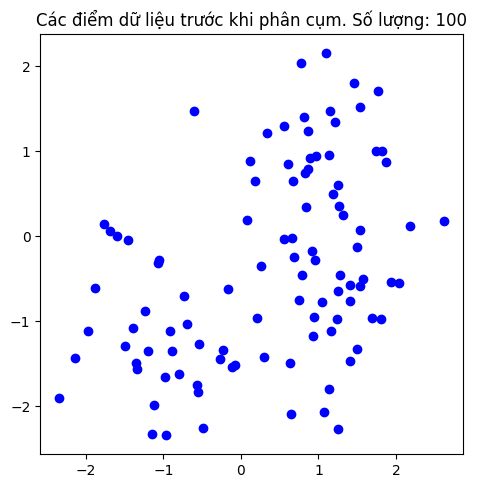

In [101]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c='blue') # c là tham số chọn màu sắc, có thể truyền vào string hoặc số id 1,2,3 ...
plt.title("Các điểm dữ liệu trước khi phân cụm. Số lượng: {}".format(n_samples))
plt.show()

###  Dựng giải thuật K-means và huấn luyện
- Sử dụng thư viện sklearn để xây dựng giải thuật K-means, xem chi tiết tại [tài liệu hướng dẫn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [102]:
k_cluster = 3
k_mean_model = KMeans(n_clusters=k_cluster, random_state=random_state)
k_mean_model.fit(X)

centers = np.array(k_mean_model.cluster_centers_) # cluster_centers_: là thuộc tính lưu trữ các 
                                                  # tâm cụm sau khi training 
print("Tâm cụm sau khi training ({} tâm): \n".format(k_cluster),
      centers)


Tâm cụm sau khi training (3 tâm): 
 [[ 1.18876797 -0.79072679]
 [-1.06697127 -1.20007515]
 [ 0.95207533  1.03879511]]


### Đánh giá mô hình

- Kiểm tra các điểm dữ liệu thuộc vào cụm nào 
- Vẽ biểu đồ hiển thị, trong đó các điểm thuộc các cụm khác nhau sẽ có các màu khác nhau 

Kết quả dự đoán cho 5 mẫu dữ liệu đầu tiên trong tập data: 

[2 2 0 1 1]


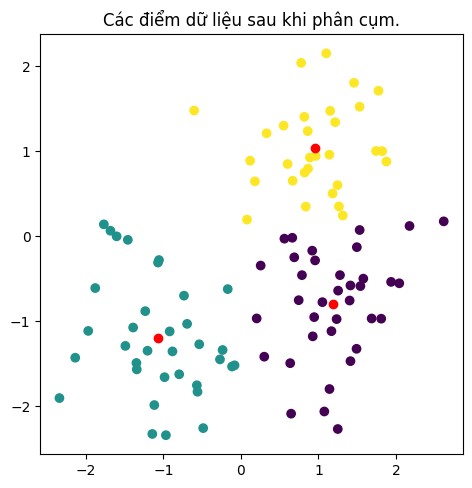

In [103]:
y_pred = k_mean_model.predict(X)
print("Kết quả dự đoán cho 5 mẫu dữ liệu đầu tiên trong tập data: \n")
print(y_pred[:5])

plt.figure(figsize=(12, 12))
plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.title("Các điểm dữ liệu sau khi phân cụm.")
plt.show()

### Bài tập 1
Yêu cầu: Thử nghiệm trường hợp dữ liệu sinh ra chỉ có 2 cụm nhưng huấn luyện K-means với các tham số k = 3,4,5 cụm

- Tự viết code sinh dữ liệu tương tự bên trên
- Xây dựng mô hình 3,4,5 cụm

Gợi ý: thay đổi tham số số cụm khi dựng giải thuật K-means

Kết quả phải ra được hình ảnh thể hiện đúng số tâm cụm và phân bố cụm. 

Số chiều dữ liệu:  (100, 2) (100,)
5 điểm dữ liệu đầu tiên: 
 [[ 0.06559615 -0.69215537]
 [-1.30865793 -1.12963607]
 [-0.04985928  1.20560824]
 [ 0.8863025   1.15300087]
 [-0.74657187 -1.65642576]]
Tâm cụm sau khi training (3 tâm): 
 [[-1.0141889  -1.11160117]
 [ 0.73567568  0.44746343]
 [ 1.14279749  1.27585635]]
Kết quả dự đoán cho 5 mẫu dữ liệu đầu tiên trong tập data: 

[0 0 1 2 0]


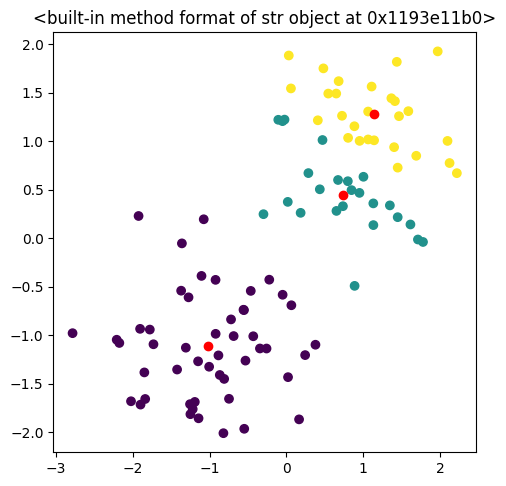

Tâm cụm sau khi training (4 tâm): 
 [[-0.57958648 -0.74186598]
 [ 0.78060436  0.45619543]
 [ 1.14279749  1.27585635]
 [-1.45515381 -1.45555476]]
Kết quả dự đoán cho 5 mẫu dữ liệu đầu tiên trong tập data: 

[0 3 1 2 3]


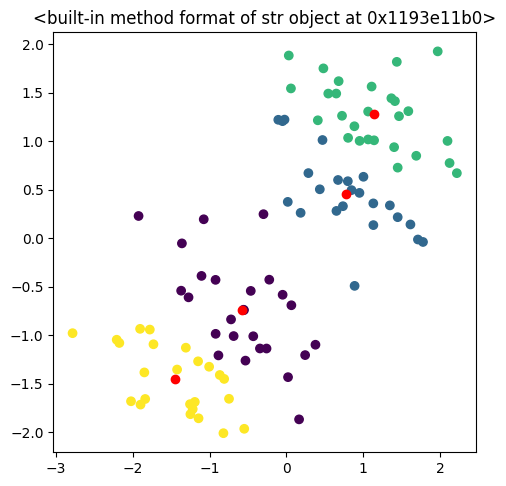

Tâm cụm sau khi training (5 tâm): 
 [[-0.52732796 -0.6600377 ]
 [ 0.78060436  0.45619543]
 [ 1.14279749  1.27585635]
 [-0.82696166 -1.60628413]
 [-1.87249959 -1.09432355]]
Kết quả dự đoán cho 5 mẫu dữ liệu đầu tiên trong tập data: 

[0 4 1 2 3]


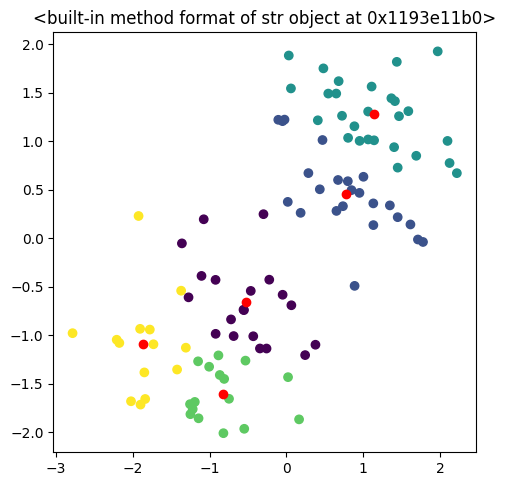

In [ ]:
# Sinh dữ liệu tương ứng với giả thiết có 2 cụm
n_samples = 100
random_state = 100
center_points = [[1, 1], [-1, -1]] # sinh ngẫu nhiên các điểm xung quanh vị trí tâm cố định 
# center_points = 3                           # tâm cụm được chọn ngẫu nhiên

X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=center_points, cluster_std=0.6)
print("Số chiều dữ liệu: ", X.shape, y.shape)
print("5 điểm dữ liệu đầu tiên: \n", X[:5])
# Xây dựng mô hình với 3, 4, 5 cụm và trực quan hóa kết quả phân cụm tương ứng.

for i in [3, 4, 5]:
      k_cluster = i
      k_mean_model = KMeans(n_clusters=k_cluster, random_state=random_state)
      k_mean_model.fit(X)

      centers = np.array(k_mean_model.cluster_centers_) # cluster_centers_: là thuộc tính lưu trữ các 
                                                      # tâm cụm sau khi training 
      print("Tâm cụm sau khi training ({} tâm): \n".format(k_cluster),
            centers)

      y_pred = k_mean_model.predict(X)
      print("Kết quả dự đoán cho 5 mẫu dữ liệu đầu tiên trong tập data: \n")
      print(y_pred[:5])

      plt.figure(figsize=(12, 12))
      plt.subplot(222)
      plt.scatter(X[:, 0], X[:, 1], c=y_pred)
      plt.scatter(centers[:, 0], centers[:, 1], c='red')
      plt.title("Các điểm dữ liệu sau khi phân {} cụm.".format(k_cluster))
      plt.show()



## Bài toán 2: Ứng dụng Kmeans cho nén ảnh 

- Đặt vấn đề:
    - Muốn xây dựng 1 hệ thống nén dữ liệu hình ảnh 
    - Có thể tuỳ chỉnh được độ sắc nét, giảm kích thước bộ nhớ, nhưng không làm sai lệch quá nhiều dưới mắt nhìn.  
- Giải pháp
    - Sử dụng giải thuật K-means, tự động phân cụm các điểm ảnh, giới hạn số lượng màu để giảm kích thước ảnh 
    - Mỗi điểm ảnh sẽ được quy về 1 cụm nào đó, mang giá trị màu bằng màu của tâm cụm. 


### Thư viện sử dụng - hỗ trợ hình ảnh 

In [105]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
from IPython.core.display import Image, display #Hiển thị ảnh

ImportError: cannot import name 'display' from 'IPython.core.display' (/usr/local/Caskroom/miniconda/base/envs/course/lib/python3.12/site-packages/IPython/core/display.py)

### Đọc dữ liệu hình ảnh
- Mỗi điểm ảnh là 1 mẫu quan sát 
- Phân cụm tập dữ liệu (tập các điểm ảnh) về k nhãn

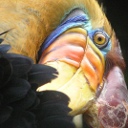

In [ ]:
path_img = 'bird_small.png'
Image(path_img, width=250, unconfined=True)

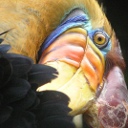

In [ ]:
path_img = 'bird_small.png'

display(Image(path_img, width=250, unconfined=True))

In [ ]:
img = io.imread(path_img)
img

array([[[219, 180, 103],
        [230, 185, 116],
        [226, 186, 110],
        ...,
        [ 14,  15,  13],
        [ 13,  15,  12],
        [ 12,  14,  12]],

       [[230, 193, 119],
        [224, 192, 120],
        [226, 192, 124],
        ...,
        [ 16,  16,  13],
        [ 14,  15,  10],
        [ 11,  14,   9]],

       [[228, 191, 123],
        [228, 191, 121],
        [220, 185, 118],
        ...,
        [ 14,  16,  13],
        [ 13,  13,  11],
        [ 11,  15,  10]],

       ...,

       [[ 15,  18,  16],
        [ 18,  21,  18],
        [ 18,  19,  16],
        ...,
        [ 81,  45,  45],
        [ 70,  43,  35],
        [ 72,  51,  43]],

       [[ 16,  17,  17],
        [ 17,  18,  19],
        [ 20,  19,  20],
        ...,
        [ 80,  38,  40],
        [ 68,  39,  40],
        [ 59,  43,  42]],

       [[ 15,  19,  19],
        [ 20,  20,  18],
        [ 18,  19,  17],
        ...,
        [ 65,  43,  39],
        [ 58,  37,  38],
        [ 52,  39,  34]]

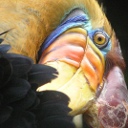

Dữ liệu ảnh trước khi reshape: (128, 128, 3)
Số chiều của dữ liệu hình ảnh:  (16384, 3)
Tổng số điểm ảnh là:  16384
Mỗi điểm ảnh có số chiều =  3


In [ ]:
path_img = 'bird_small.png'

display(Image(path_img, width=250, unconfined=True))

img = io.imread(path_img)
print("Dữ liệu ảnh trước khi reshape:", img.shape)

img_shape = img.shape # 128x128x3 
data_img = (img / 255.0).reshape(-1,img.shape[2]) # chuyển ma trận 128x128x3 về mảng 2 chiều, giữ lại chiều .shape[2]                    

print("Số chiều của dữ liệu hình ảnh: ", data_img.shape)
print("Tổng số điểm ảnh là: ", data_img.shape[0])
print("Mỗi điểm ảnh có số chiều = ", data_img.shape[1])

In [ ]:
img.shape

(128, 128, 3)

In [ ]:
data_img.shape

(16384, 3)

In [ ]:
a = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]], [[13, 14, 15], [16, 17, 18]]])
a.shape

(3, 2, 3)

In [ ]:
a.reshape(-1, 3)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

### Xây dựng mô hình kmean để nén ảnh 
- Số lượng cụm chính là số lượng màu ta giữ lại 
- Số lượng cụm càng nhỏ thì kích thước ảnh cho ra càng nhỏ 

In [ ]:
n_color = 10
k_mean_model = KMeans(n_clusters=n_color)

**Huấn luyện mô hình**  

In [ ]:
k_mean_model.fit(data_img)

KMeans(n_clusters=10)

In [ ]:
# Hiển thị một số thông tin đã học của mô hình 
print("Số chiều của tâm cụm: ", k_mean_model.cluster_centers_.shape)
print(k_mean_model.cluster_centers_)
print(k_mean_model.labels_[0:20])

Số chiều của tâm cụm:  (10, 3)
[[0.50263239 0.37283518 0.22001956]
 [0.69902202 0.6166498  0.53724848]
 [0.10019404 0.10701593 0.09722872]
 [0.97114515 0.94042363 0.80732479]
 [0.75347855 0.545263   0.26431473]
 [0.54907148 0.67244527 0.82363316]
 [0.49894299 0.44989524 0.44904775]
 [0.26022642 0.23698179 0.23037115]
 [0.91764426 0.80989343 0.65781936]
 [0.86747326 0.70137889 0.43086555]]
[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]


### Hiển thị ảnh mới sau khi nén

In [ ]:
# k_mean_model.labels_: chứa nhãn của tất cả các điểm ảnh 
# k_mean_model.cluster_centers_: chứa các tâm cụm. 
#new_arr = arr1[index]
img128=k_mean_model.cluster_centers_[k_mean_model.labels_]

print(img128.shape)

# chuẩn hoá lại kích thước ảnh theo chiều dài, rộng ban đầu 
img128=np.reshape(img128, img_shape)
print(img128.shape)
image.imsave('img128.png', img128)

(16384, 3)
(128, 128, 3)


In [ ]:
# hiển thị kích thước hình ảnh trước và sau khi nén 
import os
print('Size of compressed image: ' + str(os.path.getsize('img128.png')) + ' KB')
print('Size of original image: ' + str(os.path.getsize('bird_small.png')) + ' KB')

Size of compressed image: 8048 KB
Size of original image: 33031 KB


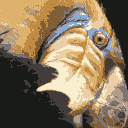

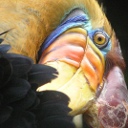

In [ ]:
from IPython.core.display import Image, display

#Save image
display(Image('img128.png', width=250, unconfined=True))
display(Image(path_img, width=250, unconfined=True))

### Bài tập 2
Yêu cầu: Nén ảnh trên thành ảnh có số màu < 5 và kiểm tra 

Gợi ý: thay đổi tham số "số cụm" khi xây dựng K-means 

In [ ]:
# code

## Bài tập bổ sung

Làm sao để biết số cụm bằng bao nhiêu là phù hợp với dữ liệu ?

Sử dụng tiêu chuẩn inertia để đánh giá: inertia được tính bằng tổng bình phương khoảng cách của các mẫu đến trung tâm cụm gần nhất của chúng

Một mô hình tốt là mô hình có chỉ số inertia nhỏ và số lượng cụm bé. Vấn đề: số cụm càng lớn thì inertia càng nhỏ. Chọn số cụm hợp lý bằng cách: chọn điểm mà độ giảm inertia bắt đầu chậm lại.

In [ ]:
# Ví dụ tính inertia cho mô hình đầu tiên
k_mean_model.inertia_

In [ ]:
### Bài tập ###
# Viết code tính inertia_ cho mô hình của dữ liệu điểm ban đầu, số lượng cụm từ 1 đến 10
# Vẽ đồ thị để quan sát sự giảm của inertia và chọn số lượng cụm phù hợp

In [ ]:
### Bài tập ###
# Viết code tính inertia_ cho mô hình của dữ liệu hình ảnh, số lượng cụm từ 1 đến 10
# Vẽ đồ thị để quan sát sự giảm của inertia và chọn số lượng cụm phù hợp